# Dedução da convergência da série de Fourier



In [3]:
import numpy as np
import matplotlib.pyplot as plt

**Exemplo:** Seja f uma função periódica, com T = 6. Em que,

$f(x) = \begin{cases}
0, \ -3\leq x < -1\\
1, \ -1\leq x < 1, \: \forall x \ \in \ [-3, 3]\\
0, \ 1\leq x < 3\\
\end{cases}$



In [4]:
periods = 5
x_array = np.linspace(-3*periods, 3*periods, 1024)


def f(x_array):
    new_x_array = ((x_array + 3) % 6) - 3
    y = np.zeros(new_x_array.size)
    
#     zeros_indexa = -3 <= x_array & x_array < -1
    ones_index   = np.logical_and(-1 <= new_x_array,  new_x_array <  1)
#     zeros_indexb =  1 <= x_array & x_array <  3
    
    y[ones_index] = 1
    
    return y
 
# print(x_array)
# print(f(x_array))

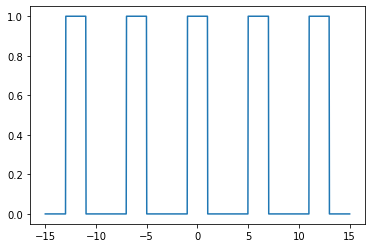

In [5]:
plt.plot(x_array, f(x_array))

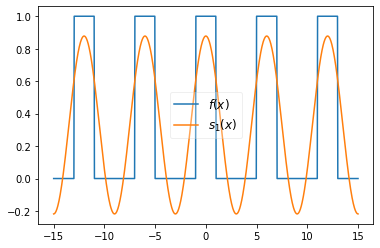

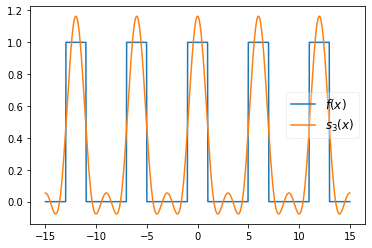

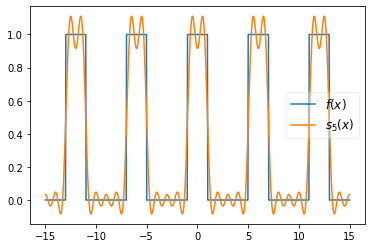

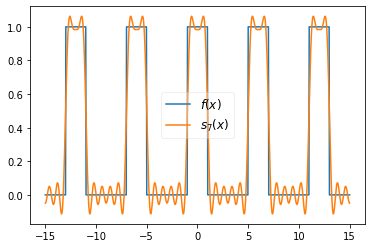

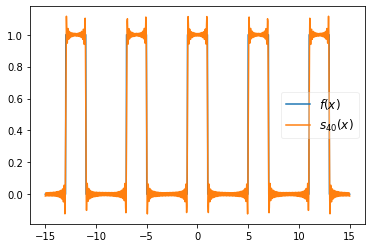

In [39]:
L = 3
l_size = 101
l = np.linspace(-L, L, l_size)
a0 = 1/L * np.trapz(f(l), x=l)

for N in [1, 3, 5, 7, 40]:
    a = [1/L * np.trapz(f(l) * np.cos(m*np.pi*l/L), x=l) for m in range(1, N+1)]
    b = [1/L * np.trapz(f(l) * np.sin(m*np.pi*l/L), x=l) for m in range(1, N+1)]

    s_x = a0 + np.sum([a[m-1]*np.cos(m*np.pi*x_array/L) + b[m-1] * np.sin(m*np.pi*x_array/L) for m in range(1, N+1)], axis=0)

    plt.plot(x_array, f(x_array), label='$f(x)$')
    plt.plot(x_array, s_x-.33, label='$s_{%d}(x)$' % N)
    plt.legend(framealpha=.3, fontsize=12)
    plt.show()